In [15]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [16]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")
split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
alpha_range = np.linspace(0.01,500,1000, endpoint=False)
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(880,2210,5.2) # Set wavelength range
pipeline_run_types = util.get_config_values("pipeline_run_types")

<h3 style="color: #00faaa">Running LASSO pipeline (total) for SNV OR MSC (comparing pre-processors)</h3>
<h5 style="color: white">Train/Test split - FIXED to 75/25</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - FIXED to 1 day</h5>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_29.csv , Preprocessor : msc, Model : lasso, Evaluator : mse
INFO Validation type : kfold-cv, folds (for CV) : 5


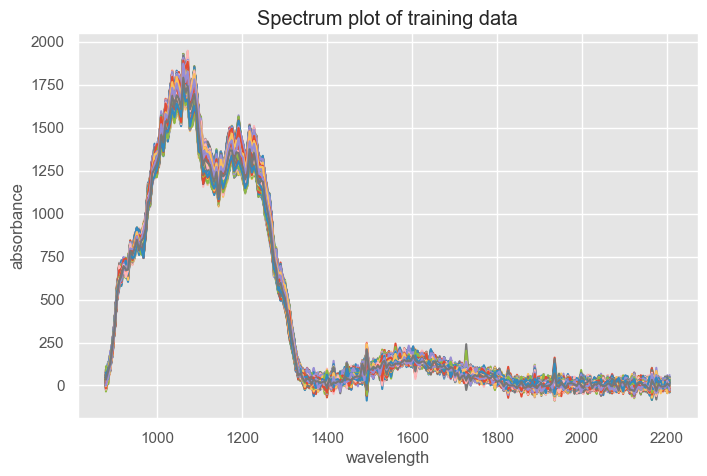

[Model Evaluation] MSE value between y_test and y_pred : 0.343


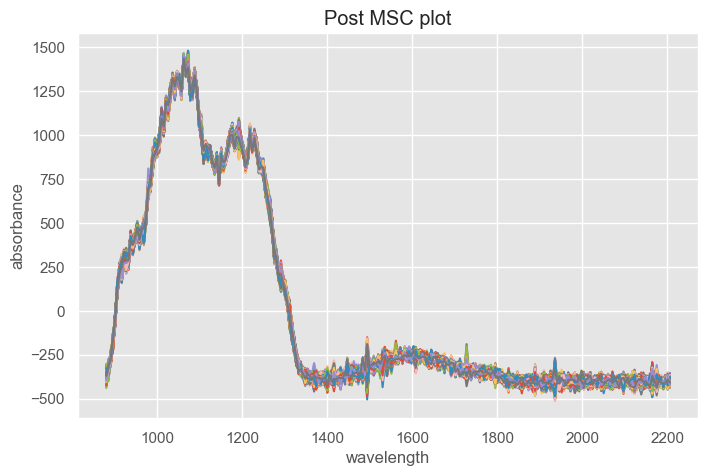

INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 0.388


INFO Optimized alpha value for Lasso 0.12105765115597347
INFO [MODEL EVALUATION]


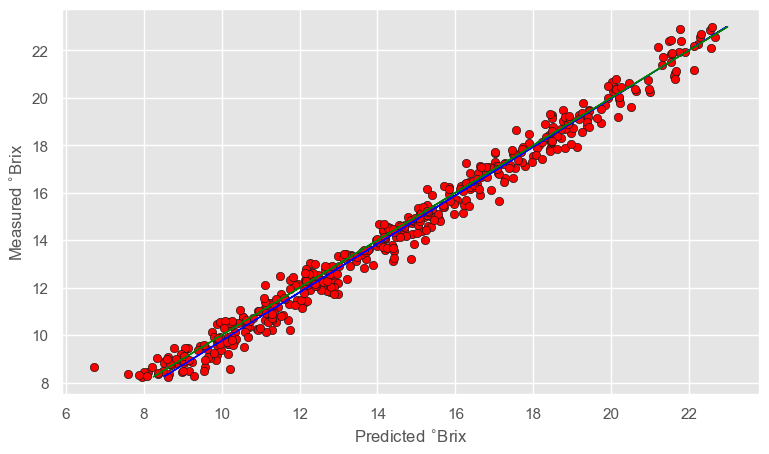

INFO Model loss : 0.2582571683670626
INFO Elapsed time for pipeline run : 3.95
INFO Pipeline end...
INFO ************************************


In [5]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[3]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[2]), showDataEDA=False)


# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

# Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
# Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
# Set models[0] for PLS and models[1] for LASSO
# evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
# preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
# preprocessor-params: only required for SavGol and its related combos.
# pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],
    'preprocessor' : preprocessors[4],              # set 3 for SNV and 4 for MSC
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],
    'evaluator' : evaluators[0],
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h3 style="color: #00faaa">Running LASSO pipeline (total) for SNV OR MSC (comparing pre-processors)</h3>
<h5 style="color: white">Train/Test split - 80/20 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV, folds=5</h5>
<h5 style="color: white">Spectrum - 1 day OR 4 days (needs to be set in params)</h5>

In [4]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[2]), showDataEDA=False)


# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

for index, val in enumerate(preprocessors):
    if index in [3, 4]:     # selecting only SNV and MSC

        pipeline_params = {
            'logger' : logger,
            'data' : data,
            'validation-type' : validation_types[2],    # set 0 for KFolds and 2 for RepeatedKFolds
            'preprocessor' : val,
            'preprocessor-params' : preprocessor_params,
            'model' : models[1],
            'evaluator' : evaluators[0],
            'alpha_range' : alpha_range,
            'folds' : int(folds),
            'wl' : wl,
            'plotting' : False,
            'showModelEvaluationPlots' : False,     # set to True to show final prediction line of best fit
            'pipeline_run_type' : pipeline_run_types[1]
        }

        start = timer()
        logger.info("************************************")
        logger.info("Pipeline Start...")
        logger.info("Pipeline params :")
        logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
                    + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
        logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
        util.pipeline(pipeline_params)
        end = timer()
        logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
        logger.info("Pipeline end...")
        logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv', '2022_06_24.csv', '2022_06_29.csv'] , Preprocessor : snv, Model : lasso, Evaluator : mse
INFO Validation type : repeated-kfold-cv, folds (for CV) : 5


[Model Evaluation] MSE value between y_test and y_pred : 0.596


INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 15.287


INFO Optimized alpha value for Lasso 0.00014312946457001424
INFO [MODEL EVALUATION]
INFO Model loss : 0.4958595143685854
INFO Elapsed time for pipeline run : 9.39
INFO Pipeline end...
INFO ************************************
INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv', '2022_06_24.csv', '2022_06_29.csv'] , Preprocessor : msc, Model : lasso, Evaluator : mse
INFO Validation type : repeated-kfold-cv, folds (for CV) : 5


[Model Evaluation] MSE value between y_test and y_pred : 0.596


INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 0.703


INFO Optimized alpha value for Lasso 0.08029849143208312
INFO [MODEL EVALUATION]
INFO Model loss : 0.498121313337538
INFO Elapsed time for pipeline run : 9.74
INFO Pipeline end...
INFO ************************************


<h3 style="color: #00faaa">LASSO | Extrapolation (Single File dataset) </h3>
<h5 style="color: white">Preprocessors - FIXED to SNV</h5>
<h5 style="color: white">Train/Test split - 75/25 OR 50/50 (needs to be set in params)</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV</h5>
<h5 style="color: white">Spectrum - FIXED to 1 day</h5>

INFO ************************************
INFO Pipeline Start [LASSO | EXTRAPOLATION]...
INFO Pipeline params :
INFO Data : 2022_07_13.csv , Preprocessor : snv, Model : lasso, Evaluator : mse
INFO Validation type : kfold-cv, folds (for CV) : 5


[Model Evaluation] MSE value between y_test and y_pred : 3.493


INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 20.940


INFO Optimized alpha value for Lasso 0.00013797983671596451
INFO [MODEL EVALUATION]


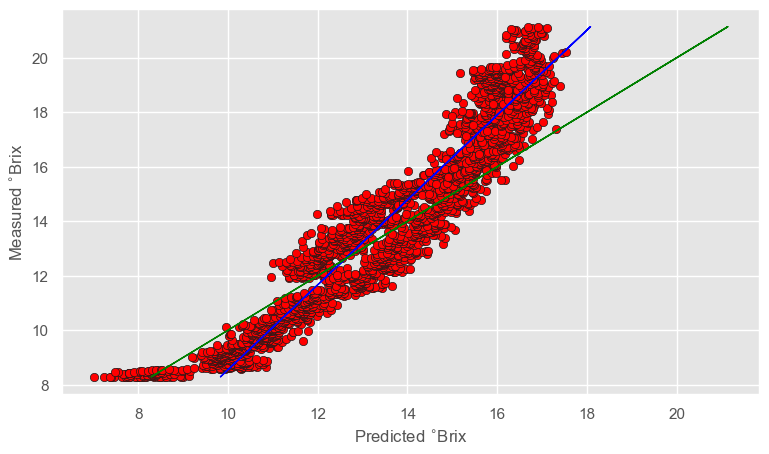

INFO Model loss : 2.497326169315512
INFO Elapsed time for pipeline run : 2.94
INFO Pipeline end...
INFO ************************************


In [13]:
# for only one file - write dataset = files[index] (index maybe 0-3).
# For multiple files set value as list. e.g. - [files[0],files[2]]
# for all files, set dataset = files
dataset = files[0]

# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting (Manual)
# read the file and create dataframe
import pandas as pd
data = pd.read_csv(dataset, sep=split_params['sep'])
data.set_index(split_params['index_column'])
X = data.drop(axis=1, columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y = data[split_params['y_data_column']]

# Create X_train, X_test, y_train and y_test *** (BY INDICES) ***
split_ratio_train = 0.5
row_start_index_train, row_stop_index_train = 0, (split_ratio_train * X.shape[0])
row_start_index_test, row_stop_index_test = row_stop_index_train+1, X.shape[0]

X_train = X.iloc[int(row_start_index_train):int(row_stop_index_train),:]
y_train = y.iloc[int(row_start_index_train):int(row_stop_index_train)]
X_test = X.iloc[int(row_start_index_test):int(row_stop_index_test),:]
y_test = y.iloc[int(row_start_index_test):int(row_stop_index_test)]

# final data tuple
data = (X_train, X_test, y_train, y_test)

# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],        # only KFolds
    'preprocessor' : preprocessors[3],              # only SNV
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],                            # LASSO
    'evaluator' : evaluators[0],                    # MSE
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,     # set to True to show final prediction line of best fit
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start [LASSO | EXTRAPOLATION]...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h3 style="color: #00faaa">LASSO | Extrapolation (All 4 Files dataset) </h3>
<h5 style="color: white">Preprocessors - FIXED SNV</h5>
<h5 style="color: white">Train/Test split - FIXED 75/25 (3 files train / 1 file test)</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV</h5>
<h5 style="color: white">Spectrum - FIXED 4 days</h5>

INFO ************************************
INFO Pipeline Start [LASSO | EXTRAPOLATION]...
INFO Pipeline params :
INFO Data :                     Timestamp  883.108  889.669  896.213  902.739  909.247  \
0     2022-06-29 09:50:01.533    63.50    42.00    126.0   179.25   344.75   
1     2022-06-29 09:50:06.642    75.50    32.00    120.0   190.25   368.75   
2     2022-06-29 09:50:11.450    86.50    37.00    110.0   211.25   348.75   
3     2022-06-29 09:50:16.559    73.50    68.00    115.0   198.25   352.75   
4     2022-06-29 09:50:21.668    90.50    34.00    112.0   199.25   353.75   
...                       ...      ...      ...      ...      ...      ...   
1867  2022-06-29 13:13:38.492    41.25    30.75    135.0   224.75   333.50   
1868  2022-06-29 13:13:43.600    55.25    43.75    125.0   258.75   336.50   
1869  2022-06-29 13:13:48.709    44.25    28.75    143.0   225.75   327.50   
1870  2022-06-29 13:13:53.517    43.25    41.75    147.0   233.75   334.50   
1871  2022-06-29 1

[Model Evaluation] MSE value between y_test and y_pred : 3.567


INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 15.438


INFO Optimized alpha value for Lasso 0.00015532630674034087
INFO [MODEL EVALUATION]


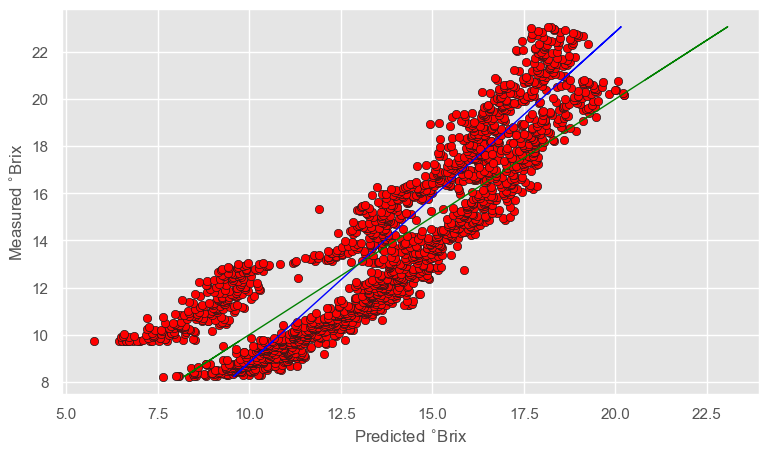

INFO Model loss : 3.614683214167931
INFO Elapsed time for pipeline run : 6.02
INFO Pipeline end...
INFO ************************************


In [17]:
# Nothing to change here.
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

# Data splitting (Manual)
# read the file and create dataframe
import pandas as pd

# CREATING TRAINING DATASET
# read 3 files and create training dataframe
df_list = []
training_files = [files[0],files[1],files[2]]
for i, file in enumerate(training_files):
    dataset = pd.read_csv(file, sep=split_params['sep'])
    dataset.set_index(split_params['index_column'])
    df_list.append(dataset)
# concatenate them together
big_df = pd.concat(df_list, ignore_index=True)
X_train = big_df.drop(axis=1,
                columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y_train = big_df[split_params['y_data_column']]

# CREATING TEST DATASET
dataset = pd.read_csv(files[3], sep=split_params['sep'])
dataset.set_index(split_params['index_column'])
X_test = dataset.drop(axis=1, columns=split_params['drop_columns'])  # drop the last column, so we have exactly 256 features
y_test = dataset[split_params['y_data_column']]

# final data tuple
data = (X_train, X_test, y_train, y_test)

# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],        # only KFolds
    'preprocessor' : preprocessors[3],              # only SNV
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],                            # LASSO
    'evaluator' : evaluators[0],                    # MSE
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,     # set to True to show final prediction line of best fit
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start [LASSO | EXTRAPOLATION]...")
logger.info("Pipeline params :")
logger.info(" , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")